# INDEPENDENT CHI SQUARE

# Import Packages

In [100]:
import pandas as pd
import scipy, scipy.stats
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import statsmodels as sm
from statsmodels.stats.contingency_tables import mcnemar#
import seaborn
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


# Load Data

In [101]:
GamingStudy = pd.read_excel('C:/Users/Tasha/iCloudDrive/Entity Academy_/DSO103C - Metrics and Data Processing/Final Project/GamingStudy_data.csv (Online Gaming Anxiety Data)/GamingStudy_data_mod.xlsx')
GamingStudy.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [102]:
GamingStudy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  GADE no.         13464 non-null  int64  
 11  SWL1             13464 non-null  int64  
 12  SWL2             13464 non-null  int64  
 13  SWL3             13464 non-null  int64  
 14  SWL4             13464 non-null  int64  
 15  SWL5             13464 non-null  int64  
 16  Game             13464 non-null  object 
 17  Platform    

# Data Wrangling: Recode & Drop Columns

# Recode age

In [103]:
def age_groups(series):
    if series < 20:
        return "Fifteen - Nineteen yrs"
    if series > 26:
        return "Thirty-One yrs and up"
    elif 20 <= series < 25:
        return "Twenty - Twenty-Four yrs"
    elif 25 <= series:
        return "Twenty-Five - Thirty yrs"
    
GamingStudy['Age Groups'] = GamingStudy['Age'].apply(age_groups)

GamingStudy['Age Groups'].value_counts(sort=False)


Twenty-Five - Thirty yrs     852
Thirty-One yrs and up        836
Fifteen - Nineteen yrs      5747
Twenty - Twenty-Four yrs    6029
Name: Age Groups, dtype: int64

# Recode hours

In [104]:
def HoursPlayed(series):
    if series <= 12:
        return "Twelve hours or less"
    if series >= 24:
        return "Twenty-Four hrs or more"
    else:
        return "Thirteen to Twenty-Three"
GamingStudy['HoursPlayed'] = GamingStudy['Hours'].apply(HoursPlayed)

GamingStudy['HoursPlayed'].value_counts(sort=False)


Thirteen to Twenty-Three    5338
Twelve hours or less        3549
Twenty-Four hrs or more     4577
Name: HoursPlayed, dtype: int64

# Recode GAD_T, SWL_T, & SPIN_T

In [105]:
# 5, 10, and 15 might be interpreted as representing mild, moderate, and severe levels of anxiety
def Anxiety_Level(series): 
    if series <= 5:
        return "Mild Anxiety"
    if series >= 10:
        return "Moderate Anxiety"
    else:
        return "Severe Anxiety"
GamingStudy['Anxiety_Level'] = GamingStudy['GAD_T'].apply(Anxiety_Level)
GamingStudy['Anxiety_Level'].value_counts(sort=False)

Mild Anxiety        8470
Severe Anxiety      2642
Moderate Anxiety    2352
Name: Anxiety_Level, dtype: int64

In [106]:
# Greater life satisfaction: 
# The following cutoffs can be used as benchmarks for interpreting scores: 
# 31–35 extremely satisfied, 
# 26–30 satisfied, 
# 20–25 neutral or slightly satisfied, 
# 15–19 slightly dissatisfied, 
# 10–14 dissatisfied, and 
# 5–9 extremely dissatisfied


def Life_satisfaction(series):
    if series <=9:
        return "Extremely Dissatisfied"
    if series ==10:
        return "Dissatisfied"
    if series ==11:
        return "Dissatisfied"
    if series ==12:
        return "Dissatisfied"
    if series ==13:
        return "Dissatisfied"
    if series ==14:
        return "Dissatisfied"
    if series ==15:
        return "Slightly Dissatisfied"
    if series ==16:
        return "Slightly Dissatisfied"
    if series ==17:
        return "Slightly Dissatisfied"
    if series ==18:
        return "Slightly Dissatisfied"
    if series ==19:
        return "Slightly Dissatisfied"
    if series ==20:
        return "Neutral or slightly satisfied"
    if series ==21:
        return "Neutral or slightly satisfied"
    if series ==22:
        return "Neutral or slightly satisfied"
    if series ==23:
        return "Neutral or slightly satisfied"
    if series ==24:
        return "Neutral or slightly satisfied"
    if series ==25:
        return "Neutral or slightly satisfied"  
    if series ==26:
        return "Satisfied"
    if series ==27:
        return "Satisfied"
    if series ==28:
        return "Satisfied"
    if series ==29:
        return "Satisfied"
    if series ==30:
        return "Satisfied"
    else:
        return "Extremely satisfied"
    
GamingStudy['Life_satisfaction'] = GamingStudy['SWL_T'].apply(Life_satisfaction)
GamingStudy['Life_satisfaction'].value_counts(sort=False)


Neutral or slightly satisfied    3594
Slightly Dissatisfied            2940
Dissatisfied                     2384
Satisfied                        2535
Extremely satisfied               851
Extremely Dissatisfied           1160
Name: Life_satisfaction, dtype: int64

In [107]:
# (Social phobia inventory (SPIN) A SPIN score of 21-30 indicates mild social phobia, 31-40 (moderate), 41-50 (severe) and above 50 (very severe))
def SocialPhobia(series):
    if series <=30:
        return "Mild social phobia"
    if series >=31:
        return "Moderate"
    if series >=41:
        return "Severe"
    else:
        return "Very severe"
    
GamingStudy['SocialPhobia'] = GamingStudy['SPIN_T'].apply(SocialPhobia)
GamingStudy['SocialPhobia'].value_counts(sort=False)


Mild social phobia    10135
Moderate               2679
Very severe             650
Name: SocialPhobia, dtype: int64

# Drop columns not using in analysis

In [108]:
GamingStudy1 = GamingStudy.drop(['S. No.','Timestamp','GAD1','GAD2','GAD3','GAD4','GAD5','GAD6','GAD7','SWL1','SWL2','SWL3','SWL4','SWL5','Game','Platform','League','highestleague','streams','SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9','SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17','Narcissism','Degree','Birthplace','Reference','Playstyle','accept','Residence_ISO3','Birthplace_ISO3','GAD_T','SWL_T','SPIN_T'], axis=1) 

In [109]:
GamingStudy1.head()

,GADE,GADE no.,Hours,earnings,whyplay,Gender,Age,Work,Residence,Age Groups,HoursPlayed,Anxiety_Level,Life_satisfaction,SocialPhobia
0,Not difficult at all,2,15.0,I play for fun,having fun,Male,25,Unemployed / between jobs,USA,Twenty-Five - Thirty yrs,Thirteen to Twenty-Three,Mild Anxiety,Neutral or slightly satisfied,Mild social phobia
1,Somewhat difficult,3,8.0,I play for fun,having fun,Male,41,Unemployed / between jobs,USA,Thirty-One yrs and up,Twelve hours or less,Severe Anxiety,Slightly Dissatisfied,Moderate
2,Not difficult at all,2,0.0,I play for fun,having fun,Female,32,Employed,Germany,Thirty-One yrs and up,Twelve hours or less,Severe Anxiety,Slightly Dissatisfied,Moderate
3,Not difficult at all,2,20.0,I play for fun,improving,Male,28,Employed,USA,Thirty-One yrs and up,Thirteen to Twenty-Three,Mild Anxiety,Slightly Dissatisfied,Mild social phobia
4,Very difficult,4,20.0,I play for fun,having fun,Male,19,Employed,South Korea,Fifteen - Nineteen yrs,Thirteen to Twenty-Three,Moderate Anxiety,Dissatisfied,Mild social phobia


# Remove Missing Values

In [110]:
GamingStudy1.dropna()

,GADE,GADE no.,Hours,earnings,whyplay,Gender,Age,Work,Residence,Age Groups,HoursPlayed,Anxiety_Level,Life_satisfaction,SocialPhobia
0,Not difficult at all,2,15.0,I play for fun,having fun,Male,25,Unemployed / between jobs,USA,Twenty-Five - Thirty yrs,Thirteen to Twenty-Three,Mild Anxiety,Neutral or slightly satisfied,Mild social phobia
1,Somewhat difficult,3,8.0,I play for fun,having fun,Male,41,Unemployed / between jobs,USA,Thirty-One yrs and up,Twelve hours or less,Severe Anxiety,Slightly Dissatisfied,Moderate
2,Not difficult at all,2,0.0,I play for fun,having fun,Female,32,Employed,Germany,Thirty-One yrs and up,Twelve hours or less,Severe Anxiety,Slightly Dissatisfied,Moderate
3,Not difficult at all,2,20.0,I play for fun,improving,Male,28,Employed,USA,Thirty-One yrs and up,Thirteen to Twenty-Three,Mild Anxiety,Slightly Dissatisfied,Mild social phobia
4,Very difficult,4,20.0,I play for fun,having fun,Male,19,Employed,South Korea,Fifteen - Nineteen yrs,Thirteen to Twenty-Three,Moderate Anxiety,Dissatisfied,Mild social phobia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,Not difficult at all,2,40.0,I play for fun,improving,Male,22,Student at college / university,France,Twenty - Twenty-Four yrs,Twenty-Four hrs or more,Mild Anxiety,Satisfied,Mild social phobia
13460,Extremely difficult,5,20.0,I play for fun,winning,Female,20,Student at college / university,USA,Twenty - Twenty-Four yrs,Thirteen to Twenty-Three,Moderate Anxiety,Neutral or slightly satisfied,Mild social phobia
13461,Not difficult at all,2,20.0,I play for fun,having fun,Male,19,Student at college / university,Norway,Fifteen - Nineteen yrs,Thirteen to Twenty-Three,Mild Anxiety,Extremely satisfied,Mild social phobia
13462,Somewhat difficult,3,5.0,I play for fun,having fun,Female,18,Student at school,Canada,Fifteen - Nineteen yrs,Twelve hours or less,Moderate Anxiety,Slightly Dissatisfied,Moderate


In [132]:
# Write DataFrame to Excel file
GamingStudy1.to_excel('GamingStudyDW.xlsx')


# Contingency Table

In [111]:
Gaming_crosstab = pd.crosstab(GamingStudy1['GADE'], GamingStudy1['HoursPlayed'])

In [112]:
Gaming_crosstab

HoursPlayed,Thirteen to Twenty-Three,Twelve hours or less,Twenty-Four hrs or more
GADE,,,
Extremely difficult,140,75,204
Not difficult at all,2509,1721,2006
Somewhat difficult,2062,1347,1739
Very difficult,380,228,404


# Run the Independent Chi-Square: #1

In [113]:
stats.chi2_contingency(Gaming_crosstab)

(69.97669795838137,
 4.1341111557863663e-13,
 6,
 array([[ 166.45563792,  110.21841592,  142.32594616],
        [2477.36839641, 1640.3867343 , 2118.24486929],
        [2045.13991416, 1354.18712446, 1748.67296137],
        [ 402.0360515 ,  266.20772532,  343.75622318]]))

# #1 Test the Assumption of 5 Cases per Expected Cell
# All of the values in the array table are greater than 5, all of the assumptions have been met.
# Chi-Square Test Statistic: 69.97669795838137
# p-value: 4.1341111557863663e-13
# Degrees of freedom: 6

# Since the p-value is less than 0.05, we do not reject the null hypothesis. 
# This means we do have sufficient evidence that says that there is a correlation between hours played and GADE (gaming and the ability to work and do normal tasks.

# #2 Analyzing Anxiety levels & Playing hours

# #2 Contingency Table: Using the crosstab function

In [114]:
Gaming2_crosstab = pd.crosstab(GamingStudy1['Anxiety_Level'], GamingStudy1['HoursPlayed'])

In [115]:
Gaming2_crosstab

HoursPlayed,Thirteen to Twenty-Three,Twelve hours or less,Twenty-Four hrs or more
Anxiety_Level,,,
Mild Anxiety,3439,2334,2697
Moderate Anxiety,852,553,947
Severe Anxiety,1047,662,933


# Chi-Square Analysis #2

In [116]:
stats.chi2_contingency(Gaming2_crosstab)

(62.52725222550489,
 8.532825636302438e-13,
 4,
 array([[3358.05555556, 2232.62254902, 2879.32189542],
        [ 932.48484848,  619.96791444,  799.54723708],
        [1047.45959596,  696.40953654,  898.1308675 ]]))

# #2 Test the Assumption of 5 Cases per Expected Cell
# All of the values in the array table are greater than 5, all of the assumptions have been met.
# Chi-Square Test Statistic: 62.52725222550489
# p-value: 8.532825636302438e-13
# Degrees of freedom: 4

# Since the p-value is less than 0.05, we do not reject the null hypothesis. 
# This means we do have sufficient evidence that says that there is a correlation between hours played and anxiety level.

# #3 Life_satisfaction & Playing hours

# Contingency Table: Using Crosstab

In [117]:
Gaming3_crosstab = pd.crosstab(GamingStudy1['Life_satisfaction'], GamingStudy1['HoursPlayed'])

In [118]:
Gaming3_crosstab

HoursPlayed,Thirteen to Twenty-Three,Twelve hours or less,Twenty-Four hrs or more
Life_satisfaction,,,
Dissatisfied,904,557,923
Extremely Dissatisfied,392,240,528
Extremely satisfied,321,264,266
Neutral or slightly satisfied,1455,1009,1130
Satisfied,1071,759,705
Slightly Dissatisfied,1195,720,1025


# Chi-Square Analysis #3

In [119]:
stats.chi2_contingency(Gaming3_crosstab)

(166.72738898335675,
 1.3194423995711992e-30,
 10,
 array([[ 945.17171717,  628.40285205,  810.42543078],
        [ 459.8989899 ,  305.76648841,  394.33452169],
        [ 337.39141414,  224.3166221 ,  289.29196376],
        [1424.89393939,  947.34893048, 1221.75713012],
        [1005.03787879,  668.2052139 ,  861.75690731],
        [1165.60606061,  774.95989305,  999.43404635]]))

# #3 Test the Assumption of 5 Cases per Expected Cell
# All of the values in the array table are greater than 5, all of the assumptions have been met.
# Chi-Square Test Statistic: 166.72738898335675
# p-value: 1.3194423995711992e-30
# Degrees of freedom: 10

# Since the p-value is less than 0.05, we do not reject the null hypothesis. 
# This means we do have sufficient evidence that says that there is a correlation between hours played and life satisfaction.

# #4 SocialPhobia levels and Playing Hours
# Contigency Table: Using Crosstab

In [120]:
Gaming4_crosstab = pd.crosstab(GamingStudy1['SocialPhobia'], GamingStudy1['HoursPlayed'])

In [121]:
Gaming4_crosstab

HoursPlayed,Thirteen to Twenty-Three,Twelve hours or less,Twenty-Four hrs or more
SocialPhobia,,,
Mild social phobia,4125,2764,3246
Moderate,977,628,1074
Very severe,236,157,257


# Chi-Square Analysis #4

In [122]:
stats.chi2_contingency(Gaming4_crosstab)

(71.23184443996473,
 1.247014458271913e-14,
 4,
 array([[4018.16919192, 2671.50289661, 3445.32791147],
        [1062.12878788,  706.16243316,  910.70877897],
        [ 257.7020202 ,  171.33467023,  220.96330957]]))

# #4 Test the Assumption of 5 Cases per Expected Cell
# All of the values in the array table are greater than 5, all of the assumptions have been met.
# Chi-Square Test Statistic: 71.23184443996473
# p-value: 1.247014458271913e-14
# Degrees of freedom: 4

# Since the p-value is less than 0.05, we do not reject the null hypothesis. 
# This means we do have sufficient evidence that says that there is a correlation between hours played and social phobia.

# CORRELATION MATRIX

# Correlation 1: GADE no. (Gaming and the ability to work and do normal tasks)

In [123]:
GamingStudy['Hours'].corr(GamingStudy['GADE no.'])

0.03074667995181933

# Correlation 2: GAD_T (Anxiety Level)

In [124]:
GamingStudy['Hours'].corr(GamingStudy['GAD_T'])

0.0127555522418026

# Correlation 3: SWL_T (Life Satisfaction)

In [125]:
GamingStudy['Hours'].corr(GamingStudy['SWL_T'])

-0.03576989680370109

# Correlation 4: SPIN_T (Social Phobia)

In [126]:
GamingStudy['Hours'].corr (GamingStudy ['SPIN_T'])

0.049049768744345336

# Drop Non-Continuous Variables

In [127]:
GamingStudy_2 = GamingStudy.drop(['S. No.','Timestamp','GAD1', 'GAD2','GAD3','GAD4','GAD5','GAD6','GAD7','GADE','SWL1', 'SWL2','SWL3','SWL4','SWL5', 'Game', 'Platform', 'earnings','whyplay','League','highestleague','streams','SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9','SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17','Narcissism','Gender','Work','Degree','Birthplace','Residence','Reference','Playstyle','accept','Residence_ISO3','Birthplace_ISO3'], axis=1)
GamingStudy_2.head()

,GADE no.,Hours,Age,GAD_T,SWL_T,SPIN_T,Age Groups,HoursPlayed,Anxiety_Level,Life_satisfaction,SocialPhobia
0,2,15.0,25,1,23,5.0,Twenty-Five - Thirty yrs,Thirteen to Twenty-Three,Mild Anxiety,Neutral or slightly satisfied,Mild social phobia
1,3,8.0,41,8,16,33.0,Thirty-One yrs and up,Twelve hours or less,Severe Anxiety,Slightly Dissatisfied,Moderate
2,2,0.0,32,8,17,31.0,Thirty-One yrs and up,Twelve hours or less,Severe Anxiety,Slightly Dissatisfied,Moderate
3,2,20.0,28,0,17,11.0,Thirty-One yrs and up,Thirteen to Twenty-Three,Mild Anxiety,Slightly Dissatisfied,Mild social phobia
4,4,20.0,19,14,14,13.0,Fifteen - Nineteen yrs,Thirteen to Twenty-Three,Moderate Anxiety,Dissatisfied,Mild social phobia


# .corr() on Entire Dataset

In [128]:
GamingStudy_2.corr(method='pearson')

,GADE no.,Hours,Age,GAD_T,SWL_T,SPIN_T
GADE no.,1.000000,0.030747,-0.028366,0.652065,-0.369782,0.372136
Hours,0.030747,1.000000,-0.020858,0.012756,-0.035770,0.049050
Age,-0.028366,-0.020858,1.000000,-0.041471,0.006397,-0.106385
GAD_T,0.652065,0.012756,-0.041471,1.000000,-0.403273,0.454654
SWL_T,-0.369782,-0.035770,0.006397,-0.403273,1.000000,-0.318592
SPIN_T,0.372136,0.049050,-0.106385,0.454654,-0.318592,1.000000


# .corr()  HEATMAP

In [131]:
GamingStudy_2.corr(method='pearson').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,GADE no.,Hours,Age,GAD_T,SWL_T,SPIN_T
GADE no.,1.0,0.030747,-0.028366,0.65207,-0.36978,0.37214
Hours,0.030747,1.0,-0.020858,0.012756,-0.03577,0.04905
Age,-0.028366,-0.020858,1.0,-0.041471,0.006397,-0.10639
GAD_T,0.65207,0.012756,-0.041471,1.0,-0.40327,0.45465
SWL_T,-0.36978,-0.03577,0.006397,-0.40327,1.0,-0.31859
SPIN_T,0.37214,0.04905,-0.10639,0.45465,-0.31859,1.0


# sns.heatmap()

<AxesSubplot:>

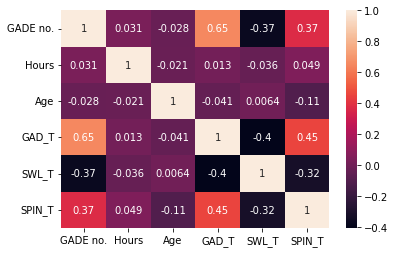

In [130]:
sns.heatmap(GamingStudy_2.corr(), annot=True)